In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Keras API is packaged inside Tensorflow
from tensorflow.keras.layers import Dense

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Regression Model 1 - Gem price prediction

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
X = df[['feature1','feature2']].values # Tensorflow works with Numpy arrays, instead of pandas dataframes like Sikitlearn did
y = df['price'].values 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train) # calculate what's needed for the scale transformation
# We don't use Test dataset at this level to avoid Data Leakage from the test set
X_train = scaler.transform(X_train) # Actually perform the transformation
# We DO NOT need to scale the outputs/target
X_test = scaler.transform(X_test)

### Choosing an optimizer and loss
Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop', loss='mse')
                  
The importatnt thing to pay attention to is the choice of loss function for different models (regression, classification, etc)

In [12]:
# Method 1 (the prefered method)
model = Sequential()

model.add(Dense(4,activation='relu')) # Hidden layer 1
model.add(Dense(4,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='relu')) # Hidden layer 3
model.add(Dense(1)) # Final Output layer (number of neurons based on data output)

model.compile(optimizer='rmsprop', loss='mse')

# Dense=regular densly-connected NN layer, meaning it's a normal feedforward network, where every neuron is connected to every other neuron in the next layer
# Units = how many neurons in the layer
# activation = activation function

# optimizer = how to optimize the weights/biases
# loss = the loss function criterea - for regression problems 'mse' is used

In [13]:
model.fit(x=X_train, y=y_train, epochs=250)
# epochs=250 means the model goes through the training dataset 250 times
# You can adjust the amount of information displayed while the cell/model-fitting is running by defining the 'verbose'

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 720us/sample - loss: 256604.7446
Epoch 2/250
700/700 [==============================] - 0s 34us/sample - loss: 256447.6642
Epoch 3/250
700/700 [==============================] - 0s 40us/sample - loss: 256267.6775
Epoch 4/250
700/700 [==============================] - 0s 34us/sample - loss: 256057.0302
Epoch 5/250
700/700 [==============================] - 0s 38us/sample - loss: 255811.0564
Epoch 6/250
700/700 [==============================] - 0s 36us/sample - loss: 255531.2208
Epoch 7/250
700/700 [==============================] - 0s 36us/sample - loss: 255213.0234
Epoch 8/250
700/700 [==============================] - 0s 38us/sample - loss: 254856.4798
Epoch 9/250
700/700 [==============================] - 0s 36us/sample - loss: 254456.3314
Epoch 10/250
700/700 [==============================] - 0s 41us/sample - loss: 254009.4705
Epoch 11/250
700/700 [==============================] - 0s 46us/sample - loss

700/700 [==============================] - 0s 38us/sample - loss: 25.7812
Epoch 182/250
700/700 [==============================] - 0s 33us/sample - loss: 25.2901
Epoch 183/250
700/700 [==============================] - 0s 34us/sample - loss: 24.9152
Epoch 184/250
700/700 [==============================] - 0s 33us/sample - loss: 24.7393
Epoch 185/250
700/700 [==============================] - 0s 34us/sample - loss: 25.0866
Epoch 186/250
700/700 [==============================] - 0s 31us/sample - loss: 24.7012
Epoch 187/250
700/700 [==============================] - 0s 33us/sample - loss: 24.7509
Epoch 188/250
700/700 [==============================] - 0s 38us/sample - loss: 24.5130
Epoch 189/250
700/700 [==============================] - 0s 38us/sample - loss: 24.3864
Epoch 190/250
700/700 [==============================] - 0s 31us/sample - loss: 24.3933
Epoch 191/250
700/700 [==============================] - 0s 55us/sample - loss: 24.4701
Epoch 192/250
700/700 [=======================

In [14]:
model.evaluate(X_test, y_test, verbose=0)
# Returns model's loss on test dataset
# This is MSE since that's the loss metric that we chose for training the model

24.973490829467774

In [15]:
model.evaluate(X_train, y_train, verbose=0)

23.96804318019322

In [16]:
test_predictions = model.predict(X_test)

In [17]:
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions'] # or # pred_df.columns = [pred_df.columns[0], 'Model Predictions']
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.088623
1,624.156198,623.412354
2,582.455066,591.982178
3,578.588606,572.108398
4,371.224104,366.453644


In [19]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.9998153580030946

In [20]:
new_data = [[998,1000]] # type(new_data) = list
new_data = scaler.transform(new_data)

In [21]:
model.predict(new_data)

array([[419.53802]], dtype=float32)

In [23]:
model.save('my_gem_model.h5')

In [22]:
from tensorflow.keras.models import load_model

In [24]:
later_model = load_model('my_gem_model.h5')
later_model.predict(new_data)

array([[419.53802]], dtype=float32)

# Regression Model 1 - Home price prediction

In [25]:
df = pd.read_csv('DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


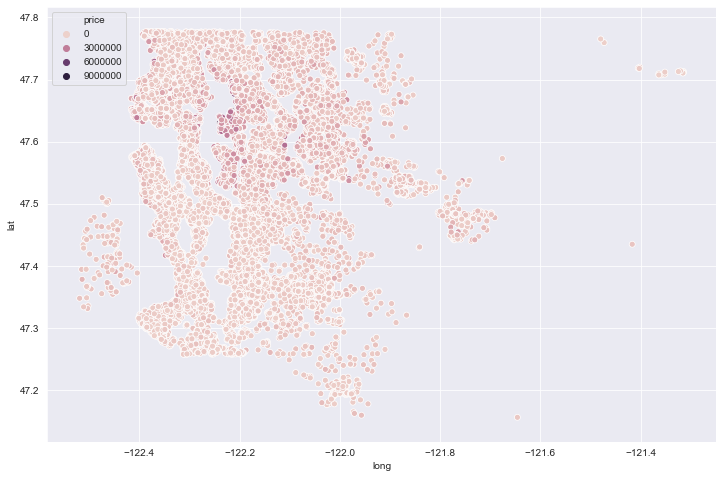

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [27]:
df= df.drop('id',axis=1)
df['date'] = pd.to_datetime(df['date']) # Converst from 2/25/2015 style to 2015-02-25
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df = df.drop('date', axis=1)
df = df.drop('zipcode', axis=1)

In [28]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit based on X_train and transform X_train using that scale in one step
X_test = scaler.transform(X_test)

In [33]:
model = Sequential()

model.add(Dense(19, activation='relu')) # We have 19 features, so maybe 19 neurons is a good choice
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [34]:
model.fit(x=X_train, y=y_train,
         validation_data= (X_test,y_test), # Validatin data is not used in training the model so it doesn't leak test data
         batch_size=128, epochs=400)

# batch_size show how large the batches of data are used for training the model - better be in powers of 2
# The smaller the batch_size, the longer it takes to train the model, but less likely to overfit the data

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 3s 203us/sample - loss: 430220805847.4417 - val_loss: 418817524237.9062
Epoch 2/400
15117/15117 [==============================] - 1s 56us/sample - loss: 428331028633.6305 - val_loss: 412623888485.1358
Epoch 3/400
15117/15117 [==============================] - 0s 29us/sample - loss: 404501157151.1427 - val_loss: 359321693773.1161
Epoch 4/400
15117/15117 [==============================] - 0s 30us/sample - loss: 299311476845.1942 - val_loss: 204334201949.5506
Epoch 5/400
15117/15117 [==============================] - 1s 35us/sample - loss: 144181130006.3706 - val_loss: 99766815129.6000
Epoch 6/400
15117/15117 [==============================] - 1s 37us/sample - loss: 99572749268.7152 - val_loss: 94797680296.1383
Epoch 7/400
15117/15117 [==============================] - 1s 48us/sample - loss: 97082006262.8045 - val_loss: 93096006441.0864
Epoch 8/400
15117/15117 [====================

15117/15117 [==============================] - 0s 32us/sample - loss: 38177601813.0497 - val_loss: 36909998595.7926
Epoch 65/400
15117/15117 [==============================] - 0s 25us/sample - loss: 37974311536.6827 - val_loss: 36704181589.3333
Epoch 66/400
15117/15117 [==============================] - 0s 25us/sample - loss: 37743759564.5697 - val_loss: 36510606151.4272
Epoch 67/400
15117/15117 [==============================] - 1s 40us/sample - loss: 37568217158.4478 - val_loss: 36411897390.7753
Epoch 68/400
15117/15117 [==============================] - 0s 28us/sample - loss: 37392427545.3680 - val_loss: 36076551231.2099
Epoch 69/400
15117/15117 [==============================] - 0s 25us/sample - loss: 37135911699.9320 - val_loss: 35879144496.0395
Epoch 70/400
15117/15117 [==============================] - 0s 26us/sample - loss: 36997418995.2652 - val_loss: 35674938390.7556
Epoch 71/400
15117/15117 [==============================] - 1s 40us/sample - loss: 36811692811.1260 - val_loss

15117/15117 [==============================] - 0s 27us/sample - loss: 32871742062.2441 - val_loss: 31528535052.6420
Epoch 128/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32830521161.6485 - val_loss: 31384341658.2321
Epoch 129/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32821662989.3952 - val_loss: 31363633829.6099
Epoch 130/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32774675053.2958 - val_loss: 31303381876.9383
Epoch 131/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32725820971.3864 - val_loss: 31250790880.3951
Epoch 132/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32705448627.3372 - val_loss: 31237713363.7531
Epoch 133/400
15117/15117 [==============================] - 0s 25us/sample - loss: 32681997145.8379 - val_loss: 31355679544.2568
Epoch 134/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32621450220.9655 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 31323742551.2977 - val_loss: 29611906197.1753
Epoch 191/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31298915052.2373 - val_loss: 29586649917.3136
Epoch 192/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31250183525.5905 - val_loss: 29652236829.0765
Epoch 193/400
15117/15117 [==============================] - 1s 39us/sample - loss: 31273975202.9614 - val_loss: 29528941727.2889
Epoch 194/400
15117/15117 [==============================] - 1s 36us/sample - loss: 31240463819.5367 - val_loss: 29528202131.2790
Epoch 195/400
15117/15117 [==============================] - 0s 27us/sample - loss: 31236821558.6987 - val_loss: 29478067617.1852
Epoch 196/400
15117/15117 [==============================] - 0s 25us/sample - loss: 31228147515.4912 - val_loss: 29568556879.0123
Epoch 197/400
15117/15117 [==============================] - 0s 26us/sample - loss: 31161793798.0795 - v

Epoch 253/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30339454419.0556 - val_loss: 28474132500.2272
Epoch 254/400
15117/15117 [==============================] - 1s 38us/sample - loss: 30456986930.7191 - val_loss: 28517551227.8914
Epoch 255/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30341652052.1648 - val_loss: 28454486688.5531
Epoch 256/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30317866391.3104 - val_loss: 28469693230.1432
Epoch 257/400
15117/15117 [==============================] - 0s 25us/sample - loss: 30317070031.1776 - val_loss: 28461935871.3679
Epoch 258/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30312483078.1811 - val_loss: 28413544453.0568
Epoch 259/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30277046218.2158 - val_loss: 28483489043.5951
Epoch 260/400
15117/15117 [==============================] - ETA: 0s - loss: 30637391536.8

15117/15117 [==============================] - 0s 32us/sample - loss: 29604793520.5938 - val_loss: 27575611594.2716
Epoch 316/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29584995521.6638 - val_loss: 27538679029.2543
Epoch 317/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29588419035.6245 - val_loss: 27511620752.1185
Epoch 318/400
15117/15117 [==============================] - 0s 29us/sample - loss: 29573281431.7677 - val_loss: 27516641148.5235
Epoch 319/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29564115140.8475 - val_loss: 27486950301.3926
Epoch 320/400
15117/15117 [==============================] - 0s 25us/sample - loss: 29534455595.2340 - val_loss: 27501618001.5407
Epoch 321/400
15117/15117 [==============================] - 0s 25us/sample - loss: 29554363093.3418 - val_loss: 27532417160.5333
Epoch 322/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29541209078.0425 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 28834422774.0763 - val_loss: 26637337971.6741
Epoch 379/400
15117/15117 [==============================] - 1s 33us/sample - loss: 28894818459.9336 - val_loss: 26640678305.1852
Epoch 380/400
15117/15117 [==============================] - 0s 28us/sample - loss: 28864084316.8184 - val_loss: 26590329140.4642
Epoch 381/400
15117/15117 [==============================] - 0s 27us/sample - loss: 28826075052.0722 - val_loss: 26558743453.3926
Epoch 382/400
15117/15117 [==============================] - 0s 30us/sample - loss: 28848803593.1616 - val_loss: 26748667732.0691
Epoch 383/400
15117/15117 [==============================] - 0s 25us/sample - loss: 29035960900.8560 - val_loss: 26629964832.8691
Epoch 384/400
15117/15117 [==============================] - 0s 25us/sample - loss: 28821064183.1601 - val_loss: 26580636735.2099
Epoch 385/400
15117/15117 [==============================] - 0s 28us/sample - loss: 28821046477.0439 - v

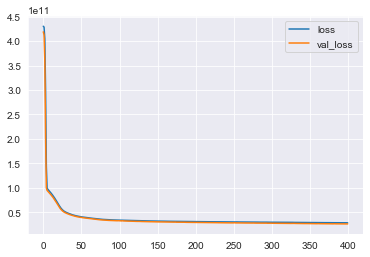

In [35]:
pd.DataFrame(model.history.history).plot() # Shows the loss on Train data as well as the Validation data
# If validation loss started to spike after a while, it would mean that the model is overfitting and doesn't do well with test data
# But here both train data and validation data loss decrease together, meaing no overfitting and we can continue training the model

In [36]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions)) # RMSE

162441.87970998618

In [37]:
explained_variance_score(y_test, predictions) # How much variance is explained by the model, 1.0 is the perfect score

0.8010498258982349

In [38]:
single_house = df.drop('price',axis=1).iloc[0] # Take the first house in the dataframe
# reshaping with 1 or -1 gives the same results - reshape from (19,) to (1, 19) so we can feed it into the model
single_house = scaler.transform(single_house.values.reshape(-1, single_house.values.shape[0]))
model.predict(single_house)

array([[280597.8]], dtype=float32)

In [39]:
df.head(1) # The real price of the first house - To be compared with the predicted value

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


# Classification Model 1 - Cancer prediction

In [41]:
df = pd.read_csv('DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit based on X_train and transform X_train using that scale in one step
X_test = scaler.transform(X_test)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
from tensorflow.keras.layers import Dropout
# Dropout consists in randomly setting a fraction `rate` of input units to 0 at each update during training time,
# which helps prevent overfitting.

In [47]:
model = Sequential()

# input layer
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))
# rate=probability to randomly turn-off neurons - Float between 0 and 1. Fraction of the input units to drop, usually 02-0.5
# rate=0.5 means 50% of neurons will be turned off randomely during each batch training and won't be updated, to prevent overfitting

# hidden layer
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.5))

# output layer
# BINARY classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
# Stops trainig when a certain critera is met
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# We want to minimize the loss, so we choose mode='min' - In case of accuracy, we could use mode='max'
# Patience = how many epochs to wait before stopping the training

In [49]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop]) # callbacks are alwas passed in as a list, even if it has only one element

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7353 - val_loss: 0.6709
Epoch 2/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6746 - val_loss: 0.6509
Epoch 3/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6727 - val_loss: 0.6346
Epoch 4/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6408 - val_loss: 0.6169
Epoch 5/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6294 - val_loss: 0.5988
Epoch 6/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6030 - val_loss: 0.5777
Epoch 7/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5913 - val_loss: 0.5552
Epoch 8/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5714 - val_loss: 0.5280
Epoch 9/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5485 - val_loss: 0.5015
Epoch 10/600
426/42

426/426 [==============================] - 0s 72us/sample - loss: 0.1343 - val_loss: 0.0835
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1483 - val_loss: 0.0837
Epoch 80/600
426/426 [==============================] - ETA: 0s - loss: 0.030 - 0s 72us/sample - loss: 0.1142 - val_loss: 0.0889
Epoch 81/600
426/426 [==============================] - 0s 72us/sample - loss: 0.1200 - val_loss: 0.0812
Epoch 82/600
426/426 [==============================] - 0s 75us/sample - loss: 0.1334 - val_loss: 0.0792
Epoch 83/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1400 - val_loss: 0.0848
Epoch 84/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1155 - val_loss: 0.0726
Epoch 85/600
426/426 [==============================] - 0s 77us/sample - loss: 0.1320 - val_loss: 0.0825
Epoch 86/600
426/426 [==============================] - 0s 74us/sample - loss: 0.1203 - val_loss: 0.0722
Epoch 87/600
426/426 [======================

426/426 [==============================] - 0s 56us/sample - loss: 0.0832 - val_loss: 0.0725
Epoch 155/600
426/426 [==============================] - 0s 57us/sample - loss: 0.1071 - val_loss: 0.0875
Epoch 156/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0901 - val_loss: 0.0869
Epoch 157/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0751 - val_loss: 0.0848
Epoch 158/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0809 - val_loss: 0.0694
Epoch 159/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1019 - val_loss: 0.0799
Epoch 160/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1084 - val_loss: 0.0873
Epoch 161/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0842 - val_loss: 0.0828
Epoch 162/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0855 - val_loss: 0.0702
Epoch 163/600
426/426 [==============================] - 0s 

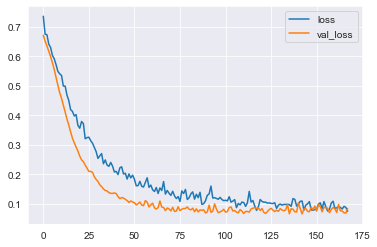

In [50]:
pd.DataFrame(model.history.history).plot() 

In [52]:
predictions = model.predict_classes(X_test) # Since this is a classification problem, we use predict_classes instead
# The results will be in " array([[1],[1],[1],[0],[1],[1], ..." format"

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, predictions)) # Reports the precision, recal, f1-score ect based on Confusion Matrix

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test, predictions)) # Reports the Confusion Matrix ([[tn, fp], [fn, tp]])

[[54  1]
 [ 3 85]]


Precision or positive predictive value (PPV):  PPV = TP/(TP + FP) = 1 - FDR

Recall, sensitivity, hit rate, or true positive rate (TPR): TPR = TP/P = TP/(TP+FN) = 1 - FNR

Accuracy (ACC) = (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)

F1 score is the harmonic mean of precision and sensitivity: F1 = 2 * (PPV.TPR)/(PPV+TPR)